In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt


import pandas as pd
import yfinance as yf
import numpy as np



finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['V','AXP','CSCO','HD','SPGI','AMAT','NOW','ABBV','AMGN','NEE','UBER','ACN','IBM','UNH','PEP','JNJ','SCHW','T']

portfolio = ['SNPS','MCHP','BSX']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    try:
        req = Request(url=url, headers={'User-Agent': 'Mozilla/6.0'})
        response = urlopen(req)

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        continue

    try:
        html = BeautifulSoup(response, 'html.parser')
        news_table = html.find(id='news-table')
        if news_table:
            news_tables[ticker] = news_table
        else:
            print(f"News table not found for {ticker}")
    except Exception as e:
        print(f"Error parsing HTML for {ticker}: {e}")
        continue





news_tables_portfolio = {}
for ticker in portfolio:
    url = finviz_url + ticker

    try:
        req = Request(url=url, headers={'User-Agent': 'Mozilla/6.0'})
        response = urlopen(req)
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        continue

    try:
        html = BeautifulSoup(response, 'html.parser')
        news_table = html.find(id='news-table')
        if news_table:
            news_tables_portfolio[ticker] = news_table
        else:
            print(f"News table not found for {ticker}")
    except Exception as e:
        print(f"Error parsing HTML for {ticker}: {e}")
        continue

In [ ]:
news_tables

{'V': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer news-table" id="news-table" width="100%">
 <tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'InvestorPlace', 'https://investorplace.com/2024/06/retire-rich-3-powerhouse-stocks-to-buy-for-long-term-stability/');">
 <td align="right" width="130">
             Jun-19-24 03:31PM
         </td>
 <td align="left">
 <div class="news-link-container">
 <div class="news-link-left">
 <a class="tab-link-news" href="https://investorplace.com/2024/06/retire-rich-3-powerhouse-stocks-to-buy-for-long-term-stability/" rel="nofollow" target="_blank">Retire Rich: 3 Powerhouse Stocks to Buy for Long-Term Stability</a>
 </div>
 <div class="news-link-right flex gap-1 items-center">
 <span>(InvestorPlace)</span></div></div></td></tr>
 <tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'InvestorPlace', 'https://investorplace.com/2024/06/3-warren-buffett-stocks-to-buy-now-june-2024/');">
 <

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):
        # Check if an anchor tag exists before accessing its text
        if row.a:
            title = row.a.text
            date_data = row.td.text.strip().split(' ')

            if len(date_data) == 1:
                time = date_data[0]
            else:
                Date = date_data[0]
                time = date_data[1]

            parsed_data.append([ticker, Date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'Date', 'time', 'title'])

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)


parsed_data_portfolio = []

for ticker, news_table in news_tables_portfolio.items():

    for row in news_table.findAll('tr'):
        # Check if an anchor tag exists before accessing its text
        if row.a:
            title = row.a.text
            date_data = row.td.text.strip().split(' ')

            if len(date_data) == 1:
                time = date_data[0]
            else:
                Date = date_data[0]
                time = date_data[1]

            parsed_data_portfolio.append([ticker, Date, time, title])

df_portfolio = pd.DataFrame(parsed_data_portfolio, columns=['ticker', 'Date', 'time', 'title'])

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df_portfolio['compound'] = df_portfolio['title'].apply(f)

In [ ]:
df

,ticker,Date,time,title,compound
0,V,Jun-19-24,03:31PM,Retire Rich: 3 Powerhouse Stocks to Buy for Lo...,0.5574
1,V,Jun-19-24,02:17PM,3 Warren Buffett Stocks to Buy Now: June 2024,0.0000
2,V,Jun-19-24,09:00AM,Investors Heavily Search Visa Inc. (V): Here i...,0.0000
3,V,Jun-19-24,06:00AM,3 Growth Stocks to Get In Early On,0.3818
4,V,Jun-19-24,05:30AM,Reversing a Credit-Card Charge Has Never Been ...,-0.5563
...,...,...,...,...,...
1795,T,May-16-24,08:23AM,AT&T (T) Boosts Connectivity With AST SpaceMob...,0.3182
1796,T,May-16-24,08:06AM,Q1 2024 AST SpaceMobile Inc Earnings Call,0.0000
1797,T,May-16-24,07:34AM,Today's Biggest Pre-Market Stock Movers: 10 To...,-0.3818
1798,T,May-16-24,06:06AM,"Update: AST SpaceMobile, AT&T Sign Six-Year De...",0.2960


In [ ]:
df_portfolio

,ticker,Date,time,title,compound
0,SNPS,Jun-19-24,10:48PM,Taiwan holds advantage on AI era technological...,0.4019
1,SNPS,Jun-19-24,09:07AM,Beyond Nvidia: 5 AI Stocks to Buy this June,0.0000
2,SNPS,Jun-17-24,08:13AM,1 Stock Secretly Fueling the AI Revolution,0.0000
3,SNPS,Jun-14-24,04:45AM,Should You Buy Synopsys Stock Right Now?,0.0000
4,SNPS,Jun-14-24,02:13AM,Synopsys certifies AI design flows on Samsung 2nm,0.0000
...,...,...,...,...,...
295,BSX,Apr-04-24,06:03AM,FTC asks Boston Scientific for more info on $3...,0.0000
296,BSX,Apr-01-24,08:00AM,Boston Scientific Announces Conference Call Di...,0.0000
297,BSX,Mar-28-24,08:03AM,Boston Scientific (BSX) and Scivita Medical Ex...,0.3182
298,BSX,Mar-25-24,09:30PM,Scivita Medical Expands Collaboration with Bos...,0.1027


In [ ]:
df = df.drop(df[df['Date']=="Today"].index)

df_portfolio = df_portfolio.drop(df_portfolio[df_portfolio['Date']=="Today"].index)


In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format='%b-%d-%y')
df_portfolio['Date'] = pd.to_datetime(df_portfolio['Date'],format='%b-%d-%y')

In [ ]:
df

,ticker,Date,time,title,compound
0,V,2024-06-19,03:31PM,Retire Rich: 3 Powerhouse Stocks to Buy for Lo...,0.5574
1,V,2024-06-19,02:17PM,3 Warren Buffett Stocks to Buy Now: June 2024,0.0000
2,V,2024-06-19,09:00AM,Investors Heavily Search Visa Inc. (V): Here i...,0.0000
3,V,2024-06-19,06:00AM,3 Growth Stocks to Get In Early On,0.3818
4,V,2024-06-19,05:30AM,Reversing a Credit-Card Charge Has Never Been ...,-0.5563
...,...,...,...,...,...
1795,T,2024-05-16,08:23AM,AT&T (T) Boosts Connectivity With AST SpaceMob...,0.3182
1796,T,2024-05-16,08:06AM,Q1 2024 AST SpaceMobile Inc Earnings Call,0.0000
1797,T,2024-05-16,07:34AM,Today's Biggest Pre-Market Stock Movers: 10 To...,-0.3818
1798,T,2024-05-16,06:06AM,"Update: AST SpaceMobile, AT&T Sign Six-Year De...",0.2960


In [ ]:
df_portfolio

,ticker,Date,time,title,compound
0,SNPS,2024-06-19,10:48PM,Taiwan holds advantage on AI era technological...,0.4019
1,SNPS,2024-06-19,09:07AM,Beyond Nvidia: 5 AI Stocks to Buy this June,0.0000
2,SNPS,2024-06-17,08:13AM,1 Stock Secretly Fueling the AI Revolution,0.0000
3,SNPS,2024-06-14,04:45AM,Should You Buy Synopsys Stock Right Now?,0.0000
4,SNPS,2024-06-14,02:13AM,Synopsys certifies AI design flows on Samsung 2nm,0.0000
...,...,...,...,...,...
295,BSX,2024-04-04,06:03AM,FTC asks Boston Scientific for more info on $3...,0.0000
296,BSX,2024-04-01,08:00AM,Boston Scientific Announces Conference Call Di...,0.0000
297,BSX,2024-03-28,08:03AM,Boston Scientific (BSX) and Scivita Medical Ex...,0.3182
298,BSX,2024-03-25,09:30PM,Scivita Medical Expands Collaboration with Bos...,0.1027


In [ ]:
agg_functions = {'compound': 'mean'}
mean_df = df.groupby(["Date", "ticker"]).aggregate(agg_functions).unstack()
mean_df = mean_df.xs('compound', axis="columns")


agg_functions = {'compound': 'mean'}
mean_df_portfolio = df_portfolio.groupby(["Date", "ticker"]).aggregate(agg_functions).unstack()
mean_df_portfolio = mean_df_portfolio.xs('compound', axis="columns")




In [ ]:
mean_df = pd.DataFrame(mean_df)
mean_df




ticker,ABBV,ACN,AMAT,AMGN,AXP,CSCO,HD,IBM,JNJ,NEE,NOW,PEP,SCHW,SPGI,T,UBER,UNH,V
Date,,,,,,,,,,,,,,,,,,
2024-04-30,NaN,NaN,-0.273200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-01,NaN,NaN,0.214300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,0.113333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,0.000000,0.094988,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-04,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.128000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,0.476850,0.485300,0.007267,NaN,NaN,NaN,NaN,NaN,NaN,0.363867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,0.403633,0.421500,0.352800,NaN,NaN,NaN,NaN,NaN,0.455050,0.350489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-08,NaN,0.088950,NaN,0.023233,NaN,NaN,NaN,NaN,NaN,0.393067,0.152112,NaN,0.318450,0.326000,NaN,NaN,NaN,NaN


In [ ]:
mean_df_portfolio = pd.DataFrame(mean_df_portfolio)
mean_df_portfolio


ticker,BSX,MCHP,SNPS
Date,,,
2024-03-24,0.636900,NaN,NaN
2024-03-25,0.102700,NaN,NaN
2024-03-28,0.318200,NaN,NaN
2024-04-01,0.000000,NaN,NaN
2024-04-02,NaN,0.2787,NaN
...,...,...,...
2024-06-13,NaN,-0.0386,0.47670
2024-06-14,NaN,0.4767,0.00000
2024-06-17,0.000000,0.0000,0.00000


In [ ]:
mean_df=mean_df.bfill()
mean_df

ticker,ABBV,ACN,AMAT,AMGN,AXP,CSCO,HD,IBM,JNJ,NEE,NOW,PEP,SCHW,SPGI,T,UBER,UNH,V
Date,,,,,,,,,,,,,,,,,,
2024-04-30,0.000000,0.476850,-0.273200,0.094988,0.000000,0.078441,-0.009550,0.238350,0.378967,0.455050,0.000000,0.688380,0.318450,0.326000,0.029050,0.052675,-0.032000,0.317200
2024-05-01,0.000000,0.476850,0.214300,0.094988,0.000000,0.078441,-0.009550,0.238350,0.378967,0.455050,0.000000,0.688380,0.318450,0.326000,0.029050,0.052675,-0.032000,0.317200
2024-05-02,0.000000,0.476850,0.113333,0.094988,0.000000,0.078441,-0.009550,0.238350,0.378967,0.455050,0.000000,0.688380,0.318450,0.326000,0.029050,0.052675,-0.032000,0.317200
2024-05-03,0.000000,0.476850,0.000000,0.094988,0.000000,0.078441,-0.009550,0.238350,0.378967,0.455050,0.000000,0.688380,0.318450,0.326000,0.029050,0.052675,-0.032000,0.317200
2024-05-04,0.000000,0.476850,0.485300,0.000000,0.000000,0.078441,-0.009550,0.238350,0.378967,0.455050,0.000000,0.688380,0.318450,0.326000,0.029050,0.052675,-0.032000,0.317200
2024-05-05,0.000000,0.476850,0.485300,0.007267,0.000000,0.078441,-0.009550,0.238350,0.378967,0.455050,-0.128000,0.688380,0.318450,0.326000,0.029050,0.052675,-0.032000,0.317200
2024-05-06,0.000000,0.476850,0.485300,0.007267,0.000000,0.078441,-0.009550,0.238350,0.378967,0.455050,0.363867,0.688380,0.318450,0.326000,0.029050,0.052675,-0.032000,0.317200
2024-05-07,0.000000,0.403633,0.421500,0.352800,0.000000,0.078441,-0.009550,0.238350,0.378967,0.455050,0.350489,0.688380,0.318450,0.326000,0.029050,0.052675,-0.032000,0.317200
2024-05-08,0.000000,0.088950,0.000000,0.023233,0.000000,0.078441,-0.009550,0.238350,0.378967,0.393067,0.152112,0.688380,0.318450,0.326000,0.029050,0.052675,-0.032000,0.317200


In [ ]:
mean_df_portfolio.head(20)

ticker,BSX,MCHP,SNPS
Date,,,
2024-03-24,0.63690,NaN,NaN
2024-03-25,0.10270,NaN,NaN
2024-03-28,0.31820,NaN,NaN
2024-04-01,0.00000,NaN,NaN
2024-04-02,NaN,0.278700,NaN
2024-04-03,NaN,0.359200,NaN
2024-04-04,-0.07955,NaN,NaN
2024-04-07,NaN,NaN,0.00000
2024-04-08,0.00000,0.401900,0.38180


In [ ]:
mean_df_portfolio=mean_df_portfolio.bfill()
mean_df_portfolio

ticker,BSX,MCHP,SNPS
Date,,,
2024-03-24,0.636900,0.2787,0.00000
2024-03-25,0.102700,0.2787,0.00000
2024-03-28,0.318200,0.2787,0.00000
2024-04-01,0.000000,0.2787,0.00000
2024-04-02,-0.079550,0.2787,0.00000
...,...,...,...
2024-06-13,0.000000,-0.0386,0.47670
2024-06-14,0.000000,0.4767,0.00000
2024-06-17,0.000000,0.0000,0.00000


<Figure size 2000x1600 with 0 Axes>

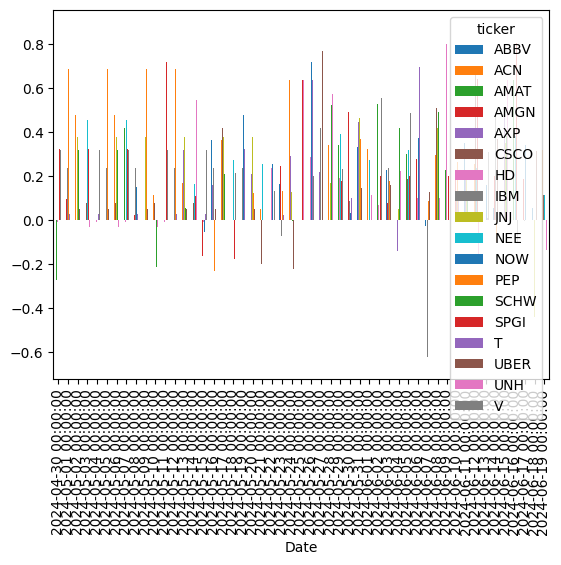

In [ ]:
plt.figure(figsize=(20,16))
mean_df.plot(kind='bar')
plt.show()

In [ ]:
treasury_df = yf.download('^FVX', start = '2024-05-15',end='2024-06-18')
treasury_df['day_change_yield'] = (treasury_df['Close']-treasury_df['Open'])*100/(treasury_df['Open'])
treasury_df = pd.DataFrame(treasury_df['day_change_yield'])

treasury_df_portfolio = yf.download('^FVX', start = '2024-04-01',end='2024-06-18')
treasury_df_portfolio['day_change_yield'] = (treasury_df_portfolio['Close']-treasury_df_portfolio['Open'])*100/(treasury_df_portfolio['Open'])
treasury_df_portfolio = pd.DataFrame(treasury_df_portfolio['day_change_yield'])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
gold_df = yf.download('GC=F', start = '2024-05-15',end='2024-06-18')
gold_df['day_change_gold'] = (gold_df['Close']-gold_df['Open'])*100/(gold_df['Open'])
gold_df = pd.DataFrame(gold_df['day_change_gold'])


gold_df_portfolio = yf.download('GC=F', start = '2024-04-01',end='2024-06-18')
gold_df_portfolio['day_change_gold'] = (gold_df_portfolio['Close']-gold_df_portfolio['Open'])*100/(gold_df_portfolio['Open'])
gold_df_portfolio = pd.DataFrame(gold_df_portfolio['day_change_gold'])


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
brent_df = yf.download('BZ=F', start = '2024-05-15',end='2024-06-18')
brent_df['day_change_brent'] = (brent_df['Close']-brent_df['Open'])*100/(brent_df['Open'])
brent_df = pd.DataFrame(brent_df['day_change_brent'])



brent_df_portfolio = yf.download('BZ=F', start = '2024-04-01',end='2024-06-18')
brent_df_portfolio['day_change_brent'] = (brent_df_portfolio['Close']-brent_df_portfolio['Open'])*100/(brent_df_portfolio['Open'])
brent_df_portfolio = pd.DataFrame(brent_df_portfolio['day_change_brent'])


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
sentiment_df = pd.concat([treasury_df, gold_df, brent_df], axis = 1)
sentiment_df

,day_change_yield,day_change_gold,day_change_brent
Date,,,
2024-05-15,-1.581567,1.147521,-0.024159
2024-05-16,1.126443,-0.397573,0.409980
2024-05-17,0.634486,1.323140,0.647173
2024-05-20,0.315101,0.749228,-0.345239
2024-05-21,-0.314605,-0.321056,-0.979689
2024-05-22,-0.089350,-1.170633,-0.703203
2024-05-23,1.502577,-1.526651,-0.403968
2024-05-24,-0.308233,-0.431149,0.711310
2024-05-28,1.932901,0.783091,2.519780


In [ ]:
sentiment_df_portfolio = pd.concat([treasury_df_portfolio, gold_df_portfolio, brent_df_portfolio], axis = 1)
sentiment_df_portfolio

,day_change_yield,day_change_gold,day_change_brent
Date,,,
2024-04-01,2.504725,0.035785,0.563669
2024-04-02,-0.434486,0.399645,1.275621
2024-04-03,-0.732267,0.556600,0.156932
2024-04-04,-1.423984,-0.560451,1.284918
2024-04-05,1.275210,1.594444,0.175800
2024-04-08,-0.359546,0.262292,0.077510
2024-04-09,-0.364222,0.243817,-1.247935
2024-04-10,5.994480,-0.724452,1.083679
2024-04-11,-0.194297,0.568014,-0.883591


In [ ]:
mean_df_portfolio

ticker,BSX,MCHP,SNPS
Date,,,
2024-03-24,0.636900,0.2787,0.00000
2024-03-25,0.102700,0.2787,0.00000
2024-03-28,0.318200,0.2787,0.00000
2024-04-01,0.000000,0.2787,0.00000
2024-04-02,-0.079550,0.2787,0.00000
...,...,...,...
2024-06-13,0.000000,-0.0386,0.47670
2024-06-14,0.000000,0.4767,0.00000
2024-06-17,0.000000,0.0000,0.00000


In [ ]:
ticker_X = {}
for ticker in tickers:
    ticker_X[ticker] = pd.DataFrame(mean_df[ticker])
    ticker_X[ticker] = ticker_X[ticker].set_axis(['compound'], axis='columns')
    ticker_X[ticker] = ticker_X[ticker].loc["2024-05-15":"2024-06-18"]
    ticker_X[ticker] = ticker_X[ticker].merge(sentiment_df,on='Date')

In [ ]:
ticker_X_test = {}
for ticker in portfolio:
    ticker_X_test[ticker] = pd.DataFrame(mean_df_portfolio[ticker])
    ticker_X_test[ticker] = ticker_X_test[ticker].set_axis(['compound'], axis='columns')
    ticker_X_test[ticker] = ticker_X_test[ticker].loc["2024-04-01":"2024-06-18"]
    ticker_X_test[ticker] = ticker_X_test[ticker].merge(sentiment_df_portfolio,on='Date')

In [ ]:
X_train = pd.DataFrame()
X_test = pd.DataFrame()
for ticker in tickers:
    df2 = ticker_X[ticker].reset_index(drop=True)
    X_train = pd.concat([X_train, df2])

for ticker in portfolio:
    df2 = ticker_X_test[ticker].reset_index(drop=True)
    X_test = pd.concat([X_test, df2])

In [ ]:
X_train.ffill()

,compound,day_change_yield,day_change_gold,day_change_brent
0,0.317200,-1.581567,1.147521,-0.024159
1,0.317200,1.126443,-0.397573,0.409980
2,0.317200,0.634486,1.323140,0.647173
3,0.213300,0.315101,0.749228,-0.345239
4,0.000000,-0.314605,-0.321056,-0.979689
...,...,...,...,...
18,0.354800,-0.517896,0.326087,-0.061002
19,0.025067,-2.271693,0.911491,0.584505
20,0.008267,-1.694914,-0.398370,0.254421
21,0.306900,0.499403,1.057646,0.584372


In [ ]:
X_test.ffill()

,compound,day_change_yield,day_change_gold,day_change_brent
0,0.0000,2.504725,0.035785,0.563669
1,0.0000,-0.434486,0.399645,1.275621
2,0.0000,-0.732267,0.556600,0.156932
3,0.0000,-1.423984,-0.560451,1.284918
4,0.3818,-0.359546,0.262292,0.077510
...,...,...,...,...
46,0.4088,-0.517896,0.326087,-0.061002
47,0.4088,-2.271693,0.911491,0.584505
48,0.0000,-1.694914,-0.398370,0.254421
49,0.0000,0.499403,1.057646,0.584372


In [ ]:
ticker_y = {}

for ticker in tickers:
    df = yf.download(ticker, start = '2024-05-15',end='2024-06-18')
    df['day_change'] = (df['Close']-df['Open'])*100/(df['Open'])
    df['day_change_label'] = np.where(df['day_change']>0,1,0)
    df = pd.DataFrame(df['day_change_label'],index = ticker_X[ticker].index)
    ticker_y[ticker] = df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
ticker_y_test = {}

for ticker in portfolio:
    df = yf.download(ticker, start = '2024-04-01',end='2024-06-18')
    df['day_change'] = (df['Close']-df['Open'])*100/(df['Open'])
    df['day_change_label'] = np.where(df['day_change']>0,1,0)
    df = pd.DataFrame(df['day_change_label'],index = ticker_X_test[ticker].index)
    ticker_y_test[ticker] = df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
y_train = pd.DataFrame()
y_test = pd.DataFrame()
for ticker in tickers:
    df2 = ticker_y[ticker].reset_index(drop=True)
    y_train = pd.concat([y_train, df2])

for ticker in portfolio:
    df2 = ticker_y_test[ticker].reset_index(drop=True)
    y_test = pd.concat([y_test, df2])

In [ ]:
y_train

,day_change_label
0,1
1,0
2,1
3,0
4,0
...,...
18,1
19,0
20,1
21,1


In [ ]:
y_test

,day_change_label
0,0
1,1
2,1
3,0
4,1
...,...
46,0
47,1
48,0
49,0


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import cross_val_score
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin

model = XGBClassifier(objective='binary:logistic')

import xgboost as xgb
def objective(space):

    model = xgb.XGBClassifier(n_estimators = space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            learning_rate = space['learning_rate'],
                            gamma = space['gamma'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree = space['colsample_bytree'])

    model.fit(X_train,y_train)


    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    CrossValMean = accuracies.mean()

    print("CrossValMean:", CrossValMean)

    return{'loss':1-CrossValMean, 'status': STATUS_OK }








space = {
    'max_depth' : hp.choice('max_depth', range(5,15, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(20, 300, 5)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

print("Best: ", best)





CrossValMean:
0.6497096399535423
CrossValMean:
0.6641695702671312
CrossValMean:
0.6685830429732869
CrossValMean:
0.6591753774680604
CrossValMean:
0.656910569105691
CrossValMean:
0.6664343786295006
CrossValMean:
0.6835656213704994
CrossValMean:
0.6300813008130082
CrossValMean:
0.668815331010453
CrossValMean:
0.6496515679442508
CrossValMean:
0.6638792102206736
CrossValMean:
0.6182926829268294
CrossValMean:
0.6350174216027875
CrossValMean:
0.64465737514518
CrossValMean:
0.635075493612079
CrossValMean:
0.6570267131242741
CrossValMean:
0.6422764227642276
CrossValMean:
0.6445993031358885
CrossValMean:
0.6760162601626015
CrossValMean:
0.6542973286875726
100%|██████████| 20/20 [00:13<00:00,  1.52trial/s, best loss: 0.31643437862950063]
Best:  {'colsample_bytree': 0.42, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5.0, 'n_estimators': 43, 'subsample': 0.27}


In [ ]:
modelnew = XGBClassifier(n_estimators = best['n_estimators'],
                            max_depth = best['max_depth'],
                            learning_rate = best['learning_rate'],
                            gamma = best['gamma'],
                            min_child_weight = best['min_child_weight'],
                            subsample = best['subsample'],
                            colsample_bytree = best['colsample_bytree'],
                                eval_metric='auc',verbosity=1

                            )


modelnew.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.42, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=43, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, modelnew.predict(X_train), labels=[0,1]))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65       198
           1       0.68      0.75      0.71       216

    accuracy                           0.69       414
   macro avg       0.69      0.68      0.68       414
weighted avg       0.69      0.69      0.68       414



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, modelnew.predict(X_test), labels=[0,1]))

              precision    recall  f1-score   support

           0       0.49      0.34      0.40        80
           1       0.46      0.62      0.53        73

    accuracy                           0.47       153
   macro avg       0.48      0.48      0.46       153
weighted avg       0.48      0.47      0.46       153



In [ ]:
X_test

,compound,day_change_yield,day_change_gold,day_change_brent
0,0.0000,2.504725,0.035785,0.563669
1,0.0000,-0.434486,0.399645,1.275621
2,0.0000,-0.732267,0.556600,0.156932
3,0.0000,-1.423984,-0.560451,1.284918
4,0.3818,-0.359546,0.262292,0.077510
...,...,...,...,...
46,0.4088,-0.517896,0.326087,-0.061002
47,0.4088,-2.271693,0.911491,0.584505
48,0.0000,-1.694914,-0.398370,0.254421
49,0.0000,0.499403,1.057646,0.584372


In [ ]:
y_test

,day_change_label
0,0
1,1
2,1
3,0
4,1
...,...
46,0
47,1
48,0
49,0


In [ ]:

for ticker in portfolio:
    y_pred = modelnew.predict(ticker_X_test[ticker].reset_index(drop=True))
    ticker_y_test[ticker]['pred'] = y_pred


In [ ]:
portfolio

['SNPS', 'MCHP', 'BSX']

In [ ]:
final_df = {}
for ticker in portfolio:
    df = yf.download(ticker, start = '2024-04-01',end='2024-06-18')
    df['day_change'] = (df['Close']-df['Open'])*100/(df['Open'])
    new_df = pd.merge(df,ticker_y_test[ticker],on='Date')
    new_df = pd.merge(new_df,ticker_X_test[ticker]['compound'],on='Date')
    new_df = pd.DataFrame(new_df,index = ticker_y_test[ticker].index)
    final_df[ticker] = new_df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
portfolio

['SNPS', 'MCHP', 'BSX']

In [ ]:
final_df['SNPS']

,Open,High,Low,Close,Adj Close,Volume,day_change,day_change_label,pred,compound
Date,,,,,,,,,,
2024-04-01,578.070007,582.669983,571.719971,576.890015,576.890015,609100,-0.204126,0,1,0.000000
2024-04-02,567.000000,571.909973,563.630005,569.820007,569.820007,739500,0.497356,1,0,0.000000
2024-04-03,565.979980,580.830017,565.979980,578.869995,578.869995,758800,2.277468,1,1,0.000000
2024-04-04,590.000000,592.710022,567.020020,567.109985,567.109985,983000,-3.879663,0,1,0.000000
2024-04-08,575.400024,577.869995,566.460022,576.359985,576.359985,605600,0.166834,1,1,0.381800
2024-04-09,582.489990,583.239990,567.150024,568.989990,568.989990,1038700,-2.317636,0,0,0.263350
2024-04-10,559.690002,564.000000,557.400024,561.229980,561.229980,780000,0.275148,1,0,0.318200
2024-04-11,560.460022,563.729980,554.380005,561.969971,561.969971,914400,0.269412,1,0,0.220200
2024-04-12,553.270020,560.520020,550.190002,557.159973,557.159973,810700,0.703084,1,1,0.515200


In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

class My_Strategy(Strategy):
    lower_bound=40

    def init(self):
        price = self.data.Close
    def next(self):
        compound_score = self.data.compound
        price = self.data.Close
        label = self.data.pred
        if ((compound_score)>0.4 and label==1):
            self.buy()
        elif ((compound_score)<-0.3 and label==0):
            self.position.close()


In [ ]:
backtest = Backtest(final_df['BSX'],My_Strategy,commission=0.002,exclusive_orders=True)

In [ ]:
stats = backtest.run()
stats

Start                     2024-04-01 00:00:00
End                       2024-06-17 00:00:00
Duration                     77 days 00:00:00
Exposure Time [%]                   84.313725
Equity Final [$]                 11026.624558
Equity Peak [$]                  11198.618289
Return [%]                          10.266246
Buy & Hold Return [%]               11.879595
Return (Ann.) [%]                   62.075106
Volatility (Ann.) [%]               28.190135
Sharpe Ratio                         2.202015
Sortino Ratio                        8.776618
Calmar Ratio                        32.905963
Max. Drawdown [%]                   -1.886439
Avg. Drawdown [%]                   -1.327846
Max. Drawdown Duration       15 days 00:00:00
Avg. Drawdown Duration        9 days 00:00:00
# Trades                                    7
Win Rate [%]                        85.714286
Best Trade [%]                       4.868101
Worst Trade [%]                     -1.259656
Avg. Trade [%]                    

In [ ]:
stats['_trades']

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,146,8,9,68.406537,68.730003,47.226141,0.004729,2024-04-12,2024-04-15,3 days
1,145,9,23,68.867463,72.220001,486.117989,0.048681,2024-04-15,2024-05-03,18 days
2,145,23,28,72.364441,73.680000,190.756067,0.018180,2024-05-03,2024-05-13,10 days
3,145,28,30,73.827360,73.860001,4.732844,0.000442,2024-05-13,2024-05-15,2 days
4,144,30,32,74.007721,74.940002,134.248583,0.012597,2024-05-15,2024-05-17,2 days
5,144,32,47,75.089882,77.199997,303.856488,0.028101,2024-05-17,2024-06-12,26 days
6,144,47,50,77.354397,76.379997,-140.313555,-0.012597,2024-06-12,2024-06-17,5 days


In [ ]:
backtest.plot(plot_width=1000)

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p3643', ...)